# Лабораторная работа №9.1 (дополнительная) по вычислительной математике
## Решение задачи Штурма-Леувиля.
### Выполнил Филиппенко Павел -- студент группы Б01-009

##### Задание XI.9.14

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.linalg import eigh_tridiagonal
from scipy.integrate import solve_ivp

In [240]:
'''
В рамках задачи примем постоянную Планка за 1
Рассматриваем квантовую частицу единичной массы m=1
Работаем на безразмерном промежутке y = x/L
'''
N = 5500
left_board = -1000
right_board = 1000
dy = 1 / N
y_dense = np.linspace(left_board, right_board, N+1)

In [241]:
def PlotWaveFunc(y, psi, E, N=3):
    fig = plt.figure()
    for i in range(N):
        plt.plot(y[1:-1], psi[i], label=f'E = {round(E[i], 2)}')
    plt.ylabel(r'$\psi(y)$')
    plt.xlabel('x/L')
    plt.legend()

def PlotEigenstates(E, N=10):
    fig = plt.figure()
    plt.bar(np.arange(0, N, 1), E[0:N])
    plt.ylabel(r'$L^2 E$')
    plt.xlabel('n')

def Eigenstates(V):
    d = 1/dy**2 + V[1:-1]
    e = -1/(2*dy**2) * np.ones(len(d) - 1)
    # v - собственные вектора, соответсвующие собственным функциями
    # w - вектор собственных значений
    w, v = eigh_tridiagonal(d, e)
    return w, v

In [242]:
def sech(x):
    return 2 / (np.exp(x) + np.exp(-x))
def U(x):
    return -2*sech(x)**2

In [243]:
V_dense = np.array([U(_) for _ in y_dense])
eigenstates, wave_functions = Eigenstates(V_dense)

/tmp/ipykernel_29293/1742699761.py:2: RuntimeWarning: overflow encountered in exp
  return 2 / (np.exp(x) + np.exp(-x))


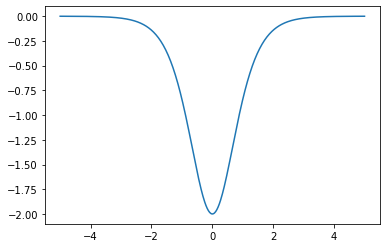

In [244]:
plt.plot(np.linspace(-5, 5, 500), U(np.linspace(-5, 5, 500)))

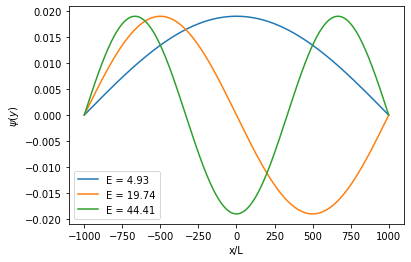

In [245]:
PlotWaveFunc(y_dense, wave_functions.T, eigenstates, 3)

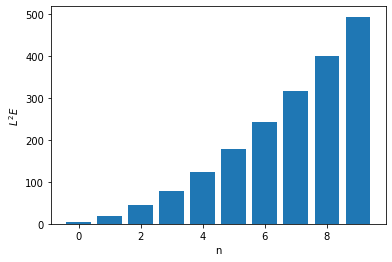

In [246]:
PlotEigenstates(eigenstates, 10)